# Tutorial 5: Chromaticity correction and non-linearities.

# Objectives
#### - Introduce sextupoles in the FODO cell for chromaticity correction.

<div>
<img src="../Figures/Tutorial5_chroma_correction.jpg" width="500"/>
</div>

#### - Non-linearities impact on the beam dynamics.

# Questions
#### 1. Add 0.5 m long sextupole attached to the two qudrupoles of the lattice defined on Tutorial 3. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles ($K2_1$ and $K2_1$).

<div>
<img src="../Figures/Tutorial5_FODO.png" width="500"/>
</div>

#### 2. Using the 𝐾21 and 𝐾21, 𝛽-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 4.
#### 3. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle?
#### Q4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on?
#### **BONUS**
#### 5. Move the tunes to (0.23, 0.23) and repeat the previous point. Is now the particle stable?

# Python libraries 

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

# Python plot commands

#### You can copy/paste, uncomment and apply the example below for plotting:

In [2]:
###########################
#### Plot example code ####
###########################

#### To change the size of the plot window
# plt.rcParams['figure.dpi'] = 100

#### Plot command
# plt.plot(x,y,'ob',label='Example')

#### Adding labels
# plt.xlabel('s[m]')
# plt.ylabel('[m]')

#### Adding a legend
# plt.legend(loc='best')

# Launching MAD-X

In [3]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.12.06 17:11:22      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Methods in the Madx class from cpymad library to be used:

#### To run the MAD-X lattice input file:

`madx.call('name_of_the_file.madx')`

#### To save the MAD-X output data from the TWISS and SUMM tables into a pandas dataframe: 

`madx.table.twiss.dframe()`

`madx.table.summ.dframe()`

#### To run a MAD-X command from the Jupyter-notebook: 

`madx.input("MAD-X command")`

# Solutions

#### 1. Add 0.5 m long sextupole attached to the two qudrupoles of the lattice defined on Tutorial 3. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles ($K2_1$ and $K2_1$). 
    
<div>
<img src="../Figures/Tutorial5_FODO.png" width="500"/>
</div>

        !In the magnet definition section:
        SF: SEXTUPOLE, L:=??, K2:=??;
        SD: SEXTUPOLE, L:=??, K2:=??;
        
        !In the sequence:
        S2 : SD, at=??;
        

In [4]:
madx.call("Tutorial5_solution.madx")

! *********************************************************************

! Definition of parameters

! *********************************************************************

!! General parameters

Lcell = 100;

nBend=736;



!! Dipole Parameters

Ld = 15;

Ad = 2*pi/nBend;



!! Quadrupole Parameters

K1F = 5e-3;

K1D = -K1F;

Lq =5;



!! Sextupole Parameters

K2F = 0.0;

K2D = -K2F;

Ls = 0.5;



! *********************************************************************

! Definition of magnets

! ********************************************************************* 



QF: QUADRUPOLE, L=Lq, K1:=K1F;

QD: QUADRUPOLE, L=Lq, K1:=K1D;

BM: SBEND, L=Ld, angle:=Ad;

SF: SEXTUPOLE, L=Ls, K2:=K2F;

SD: SEXTUPOLE, L=Ls, K2:=K2D;



! *********************************************************************

! Definition of sequence

! *********************************************************************



JUAS: SEQUENCE, REFER=center, L=100; !it is important to refer to the the center this time, t

In [5]:
myString='''
! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=7000;

! *********************************************************************
! ACTIVATE SEQUENCE
! *********************************************************************

use, sequence=JUAS;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, table= thick_sequence;
'''
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0007669724505        36.10855572 

                q1                dq1            betxmax              dxmax 
      0.2064690988       -0.240670538        159.7689581        2.989009703 

             dxrms             xcomax             xcorms                 q2 
       2.434308282                  0                  0       0.2063310524 

               dq2            betymax              dymax              dyrms 
     -0.2407924343        159.8534466                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

In [6]:
myString='''
! *********************************************************************
! TWISS
! *********************************************************************

twiss, table= thick_sequence;

! *********************************************************************
! MAKETHIN
! *********************************************************************

MAKETHIN, SEQUENCE=JUAS;

! *********************************************************************
! ACTIVATE SEQUENCE
! *********************************************************************

use, sequence=JUAS;

! *********************************************************************
! ACTIVATE SEQUENCE
! *********************************************************************

twiss, table= thin_sequence;

//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//
match, sequence=JUAS;
!! Variables
vary,name=K1F,step=0.0001;
vary,name=K1D,step=0.0001;
!! Constraints
global, Q1=0.25;
global, Q2=0.25;
!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, table=twiss_after_matching;

'''
madx.input(myString);

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0007669724505        36.10855572 

                q1                dq1            betxmax              dxmax 
      0.2064690988       -0.240670538        159.7689581        2.989009703 

             dxrms             xcomax             xcorms                 q2 
       2.434308282                  0                  0       0.2063310524 

               dq2            betymax              dymax              dyrms 
     -0.2407924343        159.8534466                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

In [7]:
#Saving the data for the Non Zero Chomaticity
thinNonZeroChromaSUMMTable=madx.table['summ'].dframe()
print(thinNonZeroChromaSUMMTable["dq1"])

#e   -0.318184
Name: dq1, dtype: float64


In [8]:
thinNonZeroChromaTWISSTable=madx.table['twiss_after_matching'].dframe()

In [9]:
thinNonZeroChromaTWISSTable.head()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,juas$start:1,marker,0.00,158.844214,-2.312753,0.000000,31.613920,0.514115,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,2.50,170.657782,-2.412675,0.002417,29.293298,0.414134,0.013090,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qf,qf:1,multipole,2.50,170.657782,2.412675,0.002417,29.293298,-0.414134,0.013090,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,5.25,157.690336,2.302760,0.005085,31.873477,-0.524113,0.027433,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s1,s1:1,multipole,5.25,157.690336,2.302760,0.005085,31.873477,-0.524113,0.027433,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### MATCHING FOR CORRECTION


In [10]:
myString='''
//*************************************************//
!   MATCHING OF THE CHROMATICITY
//*************************************************//
match, sequence=JUAS;
!!! Variables
vary,name=K2F,step=0.0001;
vary,name=K2D,step=0.0001;
!!! Constraints
global, dq1=0.0; ! Chromaticities set to 0
global, dq2=0.0;
!!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 100, tolerance=1E-12;
endmatch;
'''
madx.input(myString);

START MATCHING

number of sequences: 1
sequence name: juas
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.20252327E+00


call:       4   Penalty function =   0.50194985E-28
 ++++++++++ LMDIF ended: converged successfully
call:       4   Penalty function =   0.50194985E-28

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         dq1          4     0.00000000E+00    -6.21975138E-15     3.86853072E-29
Global constraint:         dq2          4     0.00000000E+00    -3.39259166E-15     1.15096782E-29


Final Penalty Function =   5.01949854e-29





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------------------------------------------------------------------------
k2f                       2.86196e-02

In [11]:
myString='''
//*************************************************//
!   TWISS
//*************************************************//
SELECT,FLAG=TWISS, column=name,s,betx,bety,dx,K1L,K2L;
twiss,file="twiss_after_chroma_correction.txt";
'''
madx.input(myString);

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0005392861793        43.06161907 

                q1                dq1            betxmax              dxmax 
              0.25   -6.219751377e-15        170.6577821        2.310669633 

             dxrms             xcomax             xcorms                 q2 
       1.723324818                  0                  0               0.25 

               dq2            betymax              dymax              dyrms 
   -3.39259166e-15        170.6875088                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

In [12]:
thinZeroChromaDFTable=madx.table['twiss'].dframe()

#### 2. Using the 𝐾21 and 𝐾21, 𝛽-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 2: Part 1. <a id="Q2"><a>

#### **Sextupoles contribution to the chromaticity from the formulas:
$\xi = \frac{1}{4*\pi}*(\beta_{x,S1}*K2_1*Dx_{S1}+\beta_{x,S2}*K2_2*Dx_{S2})$**

In [13]:
thinZeroChromaDFTable[['name','s','betx','dx','k2l']].head()

,name,s,betx,dx,k2l
#s,juas$start:1,0.00,158.844214,2.229002,0.00000
drift_0[0],drift_0:0,2.50,170.657782,2.310670,0.00000
qf,qf:1,2.50,170.657782,2.310670,0.00000
drift_1[0],drift_1:0,5.25,157.690336,2.220835,0.00000
s1,s1:1,5.25,157.690336,2.220835,0.01431


In [14]:
# Computatio of the sextupoles contribution to the chromaticity
aux=thinZeroChromaDFTable
(aux['betx']*aux['dx']*1*aux['k2l']).sum()/4./np.pi

0.3181838690044951

In [15]:
#dq1 before compensation
print("dq1")
thinNonZeroChromaSUMMTable["dq1"]

dq1


#e   -0.318184
Name: dq1, dtype: float64

Very good compensation!

#### 3. Track a particle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle? <a id="Q3"><a>


#### 4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on? <a id="Q4"><a>

In [16]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='withSextupoles', DELTAP=0.01;
start, x= 1e-3, px=0, y= 1e-3, py=0;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;
'''
madx.input(myString);

enter TRACK module
track_deltap:               0.01
  
iteration:   1 error:   2.169345E-02 deltap:   1.000000E-02
orbit:   2.252700E-02  3.267927E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   5.379295E-04 deltap:   1.000000E-02
orbit:   2.226580E-02  3.247280E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   7.064081E-08 deltap:   1.000000E-02
orbit:   2.226577E-02  3.247277E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         2          0                0.1                  0 
         1        100    0.0009999737307    4.155530129e-09 
         2        100                nan                nan 

                 y                 py                  t                 pt 
             0.001                  0                  0     0.00999999991

In [17]:
off_momentum_nonlinear_particle_1=madx.table['track.obs0001.p0001'].dframe()
off_momentum_nonlinear_particle_2=madx.table['track.obs0001.p0002'].dframe()

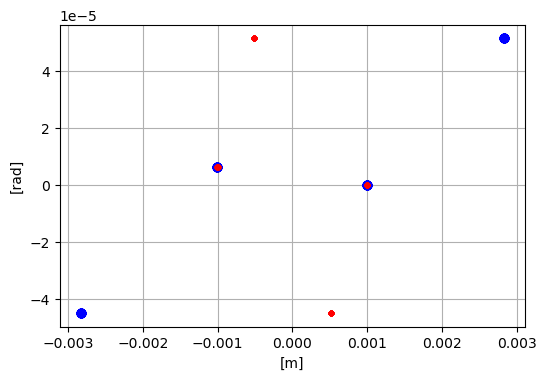

In [18]:
plt.rcParams['figure.dpi'] = 100
myParticle=off_momentum_nonlinear_particle_1
plt.plot(off_momentum_nonlinear_particle_1['x'],off_momentum_nonlinear_particle_1['px'],'ob',label='X-phase space')
plt.plot(off_momentum_nonlinear_particle_1['y'],off_momentum_nonlinear_particle_1['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

#### But for larger amplitudes...
#### What is the cost of increasing the energy acceptance...? A decrease in transverse acceptance.

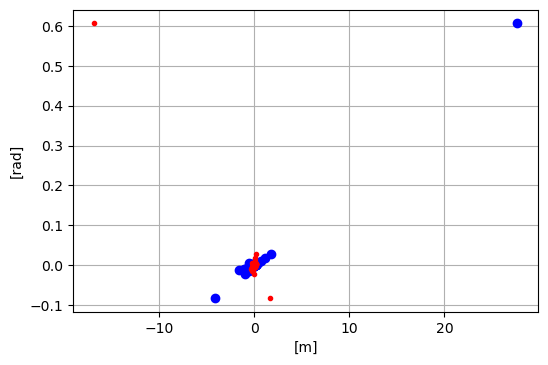

In [19]:
plt.rcParams['figure.dpi'] = 100
myParticle=off_momentum_nonlinear_particle_2
plt.plot(off_momentum_nonlinear_particle_2['x'],off_momentum_nonlinear_particle_2['px'],'ob',label='X-phase space')
plt.plot(off_momentum_nonlinear_particle_2['y'],off_momentum_nonlinear_particle_2['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

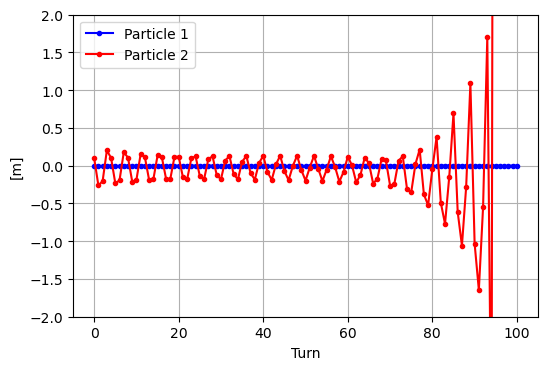

In [20]:
plt.rcParams['figure.dpi'] = 100
plt.plot(off_momentum_nonlinear_particle_1['turn'],off_momentum_nonlinear_particle_1['x'],'.-b', label='Particle 1')
plt.plot(off_momentum_nonlinear_particle_2['turn'],off_momentum_nonlinear_particle_2['x'],'.-r', label='Particle 2' )
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');
plt.ylim(-2,2)
plt.grid()

#### **BONUS**

#### 5. Move the tunes to (0.23, 0.23) and repeat the previous point. Is now the particle stable? <a id="Q5"><a>

In [21]:
myString='''
//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//
use, sequence=JUAS;

match, sequence=JUAS;
!! Variables
vary,name=K1F,step=0.0001;
vary,name=K1D,step=0.0001;
!! Constraints
global, Q1=0.23;
global, Q2=0.23;
!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;
'''
madx.input(myString);

START MATCHING

number of sequences: 1
sequence name: juas
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.80000000E-01


call:       4   Penalty function =   0.67389929E-04
call:       7   Penalty function =   0.43749329E-10
call:      10   Penalty function =   0.12418907E-19
 ++++++++++ LMDIF ended: converged successfully
call:      10   Penalty function =   0.12418907E-19

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         q1           4     2.30000000E-01     2.30000000E-01     5.54022419E-21
Global constraint:         q2           4     2.30000000E-01     2.30000000E-01     6.87868253E-21


Final Penalty Function =   1.24189067e-20





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------

In [22]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='./firstpart/newWP', DELTAP=0.01;
start, x= 1e-3, px=0, y= 1e-3, py=0;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;
!plot, file="MAD_track",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="MAD_track",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
madx.input(myString);

enter TRACK module
track_deltap:               0.01
  
iteration:   1 error:   2.132920E-02 deltap:   1.000000E-02
orbit:   2.539958E-02  3.437826E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   6.535056E-04 deltap:   1.000000E-02
orbit:   2.504765E-02  3.412053E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   1.261471E-07 deltap:   1.000000E-02
orbit:   2.504758E-02  3.412046E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         2          0                0.1                  0 
         1        100    9.855010256e-05   -1.358341187e-05 
         2        100      0.05307021097   -0.0006440131512 

                 y                 py                  t                 pt 
             0.001                  0                  0     0.00999999991

In [23]:
optWP_off_momentum_nonlinear_particle_1=madx.table['track.obs0001.p0001'].dframe()
optWP_off_momentum_nonlinear_particle_2=madx.table['track.obs0001.p0002'].dframe()

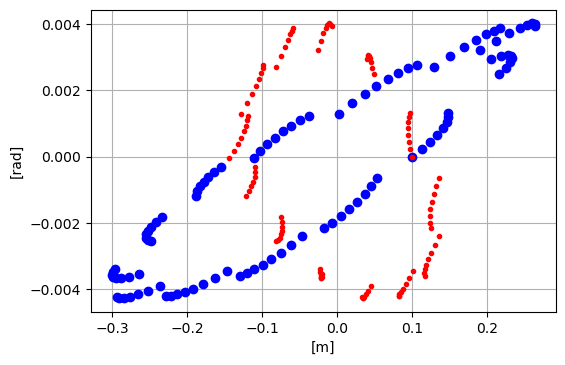

In [24]:
plt.rcParams['figure.dpi'] = 100
myParticle=optWP_off_momentum_nonlinear_particle_2
plt.plot(myParticle['x'],myParticle['px'],'ob',label='X-phase space')
plt.plot(myParticle['y'],myParticle['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

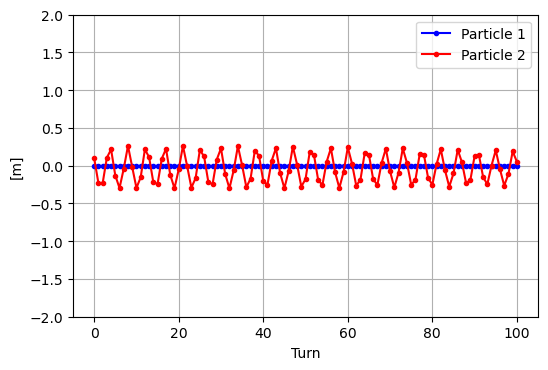

In [25]:
plt.rcParams['figure.dpi'] = 100
plt.plot(optWP_off_momentum_nonlinear_particle_1['turn'],optWP_off_momentum_nonlinear_particle_1['x'],'.-b', label='Particle 1')
plt.plot(optWP_off_momentum_nonlinear_particle_2['turn'],optWP_off_momentum_nonlinear_particle_2['x'],'.-r', label='Particle 2' )
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');
plt.ylim(-2,2)
plt.grid()

#### Sextupoles are needed for chromaticity correction...but they introduce non-linear fields which induces non-linear motion (tune shifts, resonances, chaotic motion...). Eventually particle motion becomes unstable and will be lost (dynamic aperture).

#### We can improve the solution by moving far from resonances, thus selecting an optimum WORKING POINT.